# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [96]:
import pandas as pd
import numpy as np
from scipy import stats

In [97]:
import matplotlib.pyplot as pyplot
%matplotlib inline

In [98]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [99]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [100]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [101]:
data[['race', 'call']].head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [102]:
data.race.count()

4870

In [103]:
data.call.count()

4870

In [104]:
data.call.sum()

392.0

In [105]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [106]:
total_w = data[data.race == 'w'].call.count()
total_b = data[data.race == 'b'].call.count()
total_w, total_b, total_w + total_b

(2435, 2435, 4870)

In [107]:
data[data.call == 0].race.count()

4478

In [108]:
4478+392

4870

In [109]:
pw = 235.0 / total_w      # probability of white-sounding name being called
pb = 157.0 / total_b      # probability of black-sounding name being called
p = 392.0 / 4870          # probability of being called regardless of race

pw, pb, pw-pb, p

(0.09650924024640657,
 0.06447638603696099,
 0.032032854209445585,
 0.08049281314168377)

Null hypothesis: there is no difference in likelihood of being called based on race, i.e. pb - pw = 0, or pb = pw = p

Code below calculates the difference in means between the two groups

In [110]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

Two groups are defined as race=='b' and race == 'w'

In [111]:
group1 = data[data.race=='w'].call
group2 = data[data.race=='b'].call


In [112]:
actual = TestStatistic((group1, group2))
actual

0.03203285485506058

Randomly reshuffle samples of group1 and group2 to obtain a distribution of the TestStatistic (difference in means between group1 and group2)

In [113]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

In [114]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

In [115]:
RunModel()

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32))

In [116]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000L,)

Look at p-value of results and compare with actual observed difference between the two groups

In [117]:
pvalue = float(sum(test_stats >= actual)) / len(test_stats)
pvalue

0.0

In [118]:
test_stats.max()

0.027104728

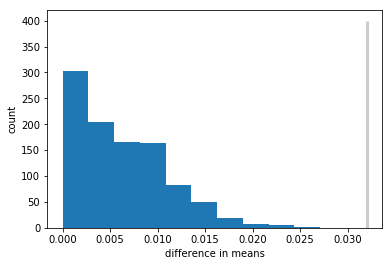

In [119]:
pyplot.vlines(actual, 0, 400, linewidth=3, color='0.8')
pyplot.hist(test_stats)
pyplot.xlabel('difference in means')
pyplot.ylabel('count')
None

Based on a sample of 1000 model runs, the actual difference in means was not reached; the maximum difference in the test runs was 0.027 compared to the actual difference of 0.032. 

Hence we can reject the null hypothesis and conclude that the observed actual difference in means between black-sounding and white-sounding names is statistically significant as p-value < 0.1%.

Can the difference be explained by other factors such as education or years of experience?

In [120]:
data.education.unique()

array([4, 3, 1, 2, 0], dtype=int64)

Split education level into 2 groups: level 3 and 4 as group1 and levels 0, 1, 2 as group2. This will test if education level influences whether a candidate is called 

In [121]:
group1 = data[data.education >= 3].call
group2 = data[data.education < 3].call

In [122]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])

In [123]:
actual = TestStatistic((group1, group2))
actual

0.006066769361495972

In [124]:
pvalue = float(sum(test_stats >= actual)) / len(test_stats)
pvalue

0.423

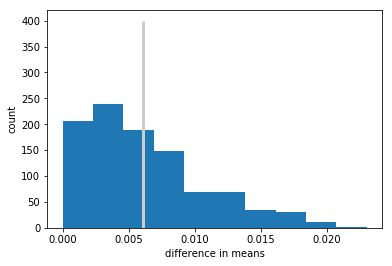

In [125]:
pyplot.vlines(actual, 0, 400, linewidth=3, color='0.8')
pyplot.hist(test_stats)
pyplot.xlabel('difference in means')
pyplot.ylabel('count')
None

Here we get a p-value of 42.3% so not statistically significant

In [126]:
data.yearsexp.unique()

array([ 6, 22,  5, 21,  3,  8,  4,  2,  7,  9, 13, 19, 12, 11, 10, 23,  1,
       14, 18, 26, 15, 25, 16, 20, 17, 44], dtype=int64)

In [127]:
data.yearsexp.mean()

7.8429158110882957

In [129]:
np.percentile(data.yearsexp, 50)

6.0

In [139]:
over6 = data[data.yearsexp <= 6].call.count()
under6 = data[data.yearsexp > 6].call.count()
over6, under6, float(over6)/(over6 + under6)

(2452, 2418, 0.5034907597535935)

Testing by years of experience by splitting the group as below the median (6 or less) and above the median (above 6); as seen above the two groups are nearly equal in size

In [130]:
group1 = data[data.yearsexp <= 6].call
group2 = data[data.yearsexp > 6].call
group1.sum(), group2.sum()

(163.0, 229.0)

The difference looks to be significant in favor of the more experienced group. Perform hypothesis test to confirm:

In [131]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])

In [132]:
actual = TestStatistic((group1, group2))
actual

0.028230026364326477

In [133]:
pvalue = float(sum(test_stats >= actual)) / len(test_stats)
pvalue

0.0

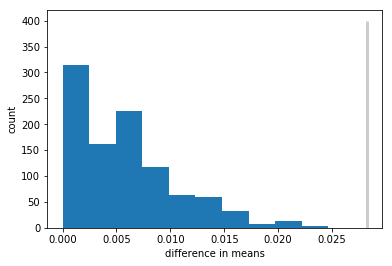

In [134]:
pyplot.vlines(actual, 0, 400, linewidth=3, color='0.8')
pyplot.hist(test_stats)
pyplot.xlabel('difference in means')
pyplot.ylabel('count')
None

This result is statistically significant as p-value < 0.1%; 100 test samples did not reach the observed difference of 0.028. 

This leads to the question if race and years of experience ar related, i.e. if white-sounding names tend to have more years of experience than black-sounding names across the whole population, regardless if they are called or not

In [146]:
highexp_white = data[(data.yearsexp > 6) & (data.race == 'w')].call
highexp_black = data[(data.yearsexp > 6) & (data.race == 'b')].call
highexp_white.count(), highexp_black.count()

(1206, 1212)

In [152]:
obsh = [highexp_white.sum(), highexp_black.sum()]
obsh

[134.0, 95.0]

In [147]:
lowexp_white = data[(data.yearsexp <= 6) & (data.race == 'w')].call
lowexp_black = data[(data.yearsexp <= 6) & (data.race == 'b')].call
lowexp_white.count(), lowexp_black.count()

(1229, 1223)

In [153]:
obsl = [lowexp_white.sum(), lowexp_black.sum()]
obsl

[101.0, 62.0]

In [155]:
exph = [((1206.0 / 2418) * 229), ((1212.0 / 2418) * 229)]
exph

[114.21588089330025, 114.78411910669975]

In [156]:
expl = [((1229.0 / 2452) * 163), ((1223.0 / 2452) * 163)]
expl

[81.69942903752039, 81.30057096247961]

The distributions of higher-educated and lower-educated groups between black and white-sounding names are very close to equal, so can perform a chi-square test on a 2x2 frequency table of the split: (w, b) x (high experience, low experience), with 1 degree of freedom.

In [150]:
from scipy.stats import chisquare

In [160]:
chisquare(f_obs = [obsh, obsl], f_exp = [exph, expl], ddof=1, axis=None)

Power_divergenceResult(statistic=15.978376380062079, pvalue=0.00033910926393217606)

The chi-square statistic of 15.98 for a k=1 distribution gives a p-value of 0.03%, a very extreme value that gives a stron indication that candidates with more experience and white-sounding names have a higher chance of being called.